In [164]:
import random
import matplotlib.pyplot as plt

In [165]:
# f(x) = 1 + 2x + x^2 formula
# 

Particle's set 1:  [0.8146751928471588, 0.5780534374514842, 0.23659333658653536, 0.8770588534538664, 0.09329318711262424]
Particle's set 2:  [0.05241272985954326, 0.634001453014337, 0.46188071442325895, 0.009513297390671305, 0.4056326258602837]
Initial global best:  2.670173764792132


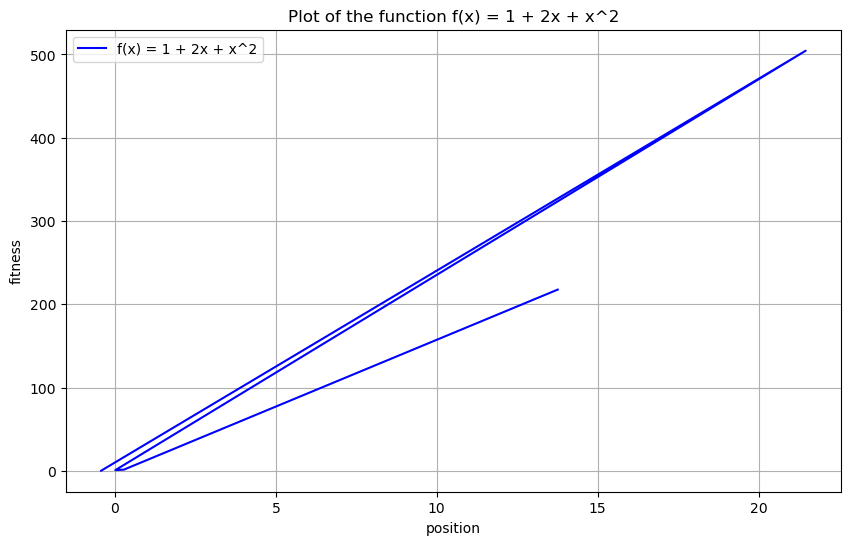

After 13 iterations: 0.0036234692935863677


In [175]:
pso(weight=0.7, c1=0.2, c2=0.6, num_of_particles=5, iterations=5)

In [161]:
def pso(weight, c1, c2, num_of_particles, iterations):
    overall_best = []
    local_best = []
    velocity = []
    positon = []
    r1 = random_particles(num_of_particles)
    r2 = random_particles(num_of_particles)
    print("Particle's set 1: ", r1)
    print("Particle's set 2: ", r2)
    position, velocity = initialization(r1, r2)
    fitness = fitness_score(position)
    local_best = fitness
    global_best = min(local_best)
    print("Initial global best: ", global_best)
    toss = True
    count = 1
    while toss:
        velocity = find_velocity(weight, velocity, c1, c2, local_best, position, global_best, r1, r2, num_of_particles)
        # print("current velocity: ", velocity)
        position = update_position(velocity, position, num_of_particles)
        # print("current positions: ", position)
        fitness = fitness_score(position)
        overall_best.append(global_best)
        global_best, local_best = update_optimum(fitness, local_best, global_best, num_of_particles)
        toss = find_best(overall_best, global_best)
        count += 1
    draw_graph(position, fitness)
    print(f"After {count} iterations: {global_best}")

In [87]:
def random_particles(num):
    particles = [random.uniform(0, 1) for _ in range(num)]
    return particles

In [88]:
def initialization(r1, r2):
    cp = [10 * (x - 0.5) for x in r1]       # Adjusts each element in r1 and multiply the answer by 10
    v = [y - 0.5 for y in r2]        # Adjusts each element in r2
    return cp, v
    

In [89]:
def fitness_score(cp):
    cf = []
    cf = [(1 + 2 * x + x**2) for x in cp]
    return cf

In [72]:
def find_velocity(weight,v, c1, c2, local_optimum, cp, global_optimum, r1, r2, particles):
    # v(i+1) = w * v(i) + c1*r1*(local[i] - cp[i]) + c2*r2*(global(i) - cp(i))
    b = []
    c = []
    a = [weight * x1 for x1 in v]
    b = [c1 * r1[i] * (local_optimum[i] - cp[i]) for i in range(particles)]  # Cognitive component
    c = [c2 * r2[i] * (global_optimum - cp[i]) for i in range(particles)]     # Social component
    
    current_v = [a[i] + b[i] + c[i] for i in range(particles)]
    return current_v                

In [82]:
def update_position(velocities, positions, particles):
    new_positions = [positions[i] + velocities[i] for i in range(particles)]
    return new_positions
    

In [111]:
def update_optimum(fitness, locals, global_optmium, particles):
    # print(fitness)
    for i in range(particles):
        if fitness[i] < locals[i]:
            locals[i] = fitness[i]
    global_optmium = min(locals)
    
    return global_optmium, locals     
    

In [141]:
def find_best(all_best, global_best):
    count = 0
    for i in all_best:
        if i == global_best:
            count += 1
    if count > 10:
        return False
    return True

In [174]:
def draw_graph(x, y):
    x_values = x
    y_values = y
    
    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label="f(x) = 1 + 2x + x^2", color="blue")
    plt.title("Plot of the function f(x) = 1 + 2x + x^2")
    plt.xlabel("position")
    plt.ylabel("fitness")
    plt.grid()
    plt.legend()
    plt.show()